# Supervised learning
1. Linear Regression
2. Logistic Regression
3. Decision tree
4. K-NN 
5. SVM

## Simple linear regression

### Best fit model manually

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read data
data = pd.read_csv("datasets/computers.csv")
data.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [2]:
x = data.Units
y = data.Minutes

xiyi = x*y
n = len(data)
xmean = data.Units.mean()
ymean = data.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)

print('intercept: ', c, 'coefficient: ',m)

intercept:  4.161654135338296 coefficient:  15.508771929824569


In [3]:
#EStimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c+m*data.Units

#Adding the predicted values to dataset
data["min_best_fit_model"] = min_best_fit_model

#printing the values predicted bu the best fit model
data[["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit modes line')

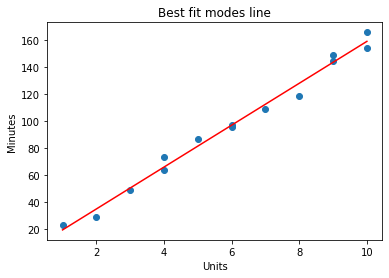

In [4]:
#visualizing the best fit model

fig, ax = plt.subplots()

#plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=data)

#plotting the target values predicted by the best fit model
ax.plot(data.Units,data.min_best_fit_model,color="red")

ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit modes line")

In [5]:
#computing the individual errors for the best fit model
best_fit_model_obs = pd.DataFrame({"Units":data.Units,"Actual time":data.Minutes,"Predicted time":data.min_best_fit_model,
                                   "Error":data.min_best_fit_model - data.Minutes})
best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [6]:
#sum of squared errors for the best fit model
sum(best_fit_model_obs.Error**2)

348.848370927318

### Best fit model using sklearn.linear_model.LinearRegression

In [7]:
x = data[["Units"]]
y = data["Minutes"]

from sklearn.linear_model import LinearRegression

#creating a linear regression model
model = LinearRegression()

#fitting the model
model.fit(x,y)

#intercept
print("intercept: ",model.intercept_)

#slope
print("Slope: ",model.coef_)

intercept:  4.16165413533831
Slope:  [15.50877193]


### computing coefficient of determination

In [8]:
SST = sum((data.Minutes.mean() - data.Minutes)**2)
print("SST: ",SST)

SSE = sum(best_fit_model_obs.Error**2)
print("SSE: ",SSE)

SSR = SST - SSE
print("SSR: ",SSR)

Rsq = SSR/SST
print("Rsq: ",Rsq)

Rsq1 = model.score(data[["Units"]],y)
print("Rsq: ",Rsq1)

SST:  27768.357142857145
SSE:  348.848370927318
SSR:  27419.508771929828
Rsq:  0.9874371980620736
Rsq:  0.9874371980620736


### Multiple linear regression model

In [9]:
delivery = pd.read_csv("delivery.csv")

delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


In [10]:
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


#### Visualizing the delivery data set

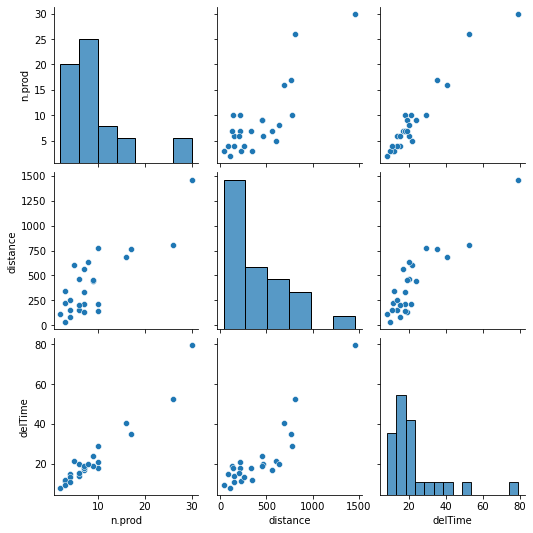

In [11]:
import seaborn as sns

sns.pairplot(delivery)

In [12]:
## building a multiple linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = delivery[['n.prod','distance']]
y = delivery['delTime']

model.fit(x,y)

print('intercept: ',model.intercept_)
print('slope: ',model.coef_)

intercept:  2.3412311451922
slope:  [1.61590721 0.01438483]


#### Visualizing the multiple linear regression

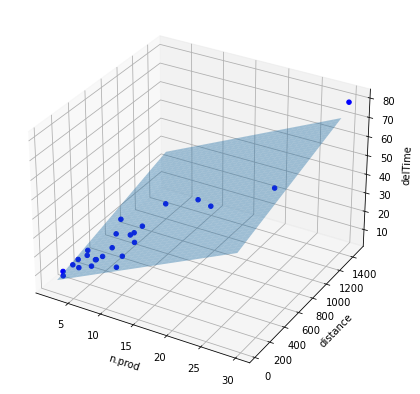

In [13]:
#setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d') #projection=3d used to have 3D axes

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery['n.prod'],ys = delivery['distance'],zs=delivery['delTime'],
           c='blue',alpha=1,marker='o')

ax.set_xlabel('n.prod')
ax.set_ylabel('distance')
ax.set_zlabel('delTime')

#creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery['n.prod'].min(),delivery['n.prod'].max(),1)
y_surf = np.arange(delivery['distance'].min(),delivery['distance'].max(),1)
x_surf,y_surf = np.meshgrid(x_surf,y_surf)
x_mesh = pd.core.frame.DataFrame({'n.prod':x_surf.ravel(), 'distance':y_surf.ravel()})

#predicting the output of the model for every point in the mesh
out = model.predict(x_mesh)

#plotting the regression plane
ax.plot_surface(x_surf,y_surf,out.reshape(x_surf.shape),alpha=0.4) #alpha - transperancy surface

#### Checking for multicollinearity

In [14]:
# finding the correlation
np.corrcoef(delivery["n.prod"],delivery["distance"])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(x.values,idx) 
           for idx in range(x.shape[1])],
          index=x.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64


#### coefficient of determination

In [16]:
# score() method for regression model, returns the 'coefficient of determination' (r^2) value for the model
model.score(x,y)

0.9595937494832257

#### Adjusted R-square

The adjusted Rsw takes into account the number of predictor variables and the number of samples or observations included in the Regression model.

The adjusted Rsq is defined as: 

Rsq = 1 - [SSE/(n-k-1)]/[SST/(n-1)]


Where, n is the number of observations and k is the number of number of predictor variables in the model. 

In [17]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))
#sample model1 score
#0.9304813135986855
# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))
#sample model2 score
#0.9595937494832257

0.9304813135986855
0.9595937494832257


In [18]:
#computation of adjusted R-squared
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)

0.9559204539817008


## End-to-end ML process of regression analysis

In [19]:
house_data = pd.read_csv("kc_house_data.csv")

#print the shape of dataframe
house_data.shape

(21613, 21)

In [20]:
#print the columns in df
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
#info about the df
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
house_data_df = house_data[['price','date','bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','zipcode']]

In [23]:
# Extracting year and month from date
house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
house_data_df.loc[:,"month"] = house_data["date"].str[4:6]
#removing date after this extraction
house_data_df = house_data_df.drop(columns=["date"])


C:\Users\Shrinath\AppData\Local\Temp\ipykernel_1392\1152359191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
C:\Users\Shrinath\AppData\Local\Temp\ipykernel_1392\1152359191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"month"] = house_data["date"].str[4:6]


In [24]:
#encoding categorical variable

cat_features = ['waterfront','view','condition','grade','year','month','zipcode']

house_data_df = pd.get_dummies(house_data_df,columns=cat_features)


In [25]:
print(house_data_df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)


In [26]:
#Normalizing the continuous numerical variables
from sklearn.preprocessing import StandardScaler

#finding the mean and std of numerical columns
scaler = StandardScaler().fit(house_data_df[['price','bedrooms','bathrooms','sqft_living','floors']])

#scaling columns to a common range
house_data_normalized = scaler.transform(house_data_df[['price','bedrooms','bathrooms','sqft_living','floors']])

house_data_normalized

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502, -0.915427  ],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434,  0.93650577],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404, -0.915427  ],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732,  0.93650577],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773,  0.93650577],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732,  0.93650577]])

In [27]:
#Replacing the numerical columns with normalized values
house_data_df_normalized = pd.DataFrame(house_data_normalized,columns=['price','bedrooms','bathrooms','sqft_living','floors'])
house_data_df_normalized = house_data_df_normalized.join((house_data_df[house_data_df.columns.drop(['price','bedrooms','bathrooms','sqft_living','floors'])]))

In [28]:
#selecting features and target
Y = house_data_df_normalized['price']

X = house_data_df_normalized[house_data_df_normalized.columns.drop('price')]

print(X.shape)

(21613, 112)


In [29]:
#splitting into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

X_train.shape, X_test.shape

((17290, 112), (4323, 112))

In [30]:
#Model building

#importing required module to build the model
from sklearn.linear_model import LinearRegression

#building and training the model
model = LinearRegression()
model.fit(X_train,Y_train)

#Evaluating the model on the train and test data for R-squared score
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

print("Train score :", train_score)
print("Test score: ",test_score)

Train score : 0.8336988146897127
Test score:  0.831310838809519


#### Root mean squared error = [mean((actual target value - predicted target value)^2)]^0.5

In [31]:
#Evaluating the model performance using RMSE

from sklearn.metrics import mean_squared_error

#root mean square error (RMSE) calculation for train data
train_predictions = model.predict(X_train)
train_RMSE = mean_squared_error(Y_train,train_predictions)**0.5

#root mean square error (RMSE) calculation for test data
test_predictions = model.predict(X_test)
test_RMSE = mean_squared_error(Y_test,test_predictions)**0.5

print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)

Train RMSE :  0.40780068523861007
Test RMSE :  0.41070713521743135


Model performance on train and test data is poor (High RMSE)

Such models are typically referred to as underfit models because the model cannot explain the variation in the data reasonably. In such situations, quality and veracity of the data should be relooked and the features selected to build the model should be analysed. This might require more time and effort in engineering the features. 

Model performance on train data is good (Low RMSE, High R-squared) but on test data is poor (High RMSE)

Such models are typically referred to as overfit models, i.e. they have been fit perfectly for the train data but are not generalized enough.

## Logistic Regression

In [32]:
#read the data
chd = pd.read_csv('chd_data.csv')

chd.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


Text(0.5, 1.0, 'Age vs Chd')

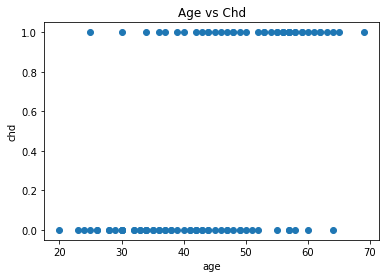

In [33]:
#plotting the chd values against the age value
plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs Chd")

In [34]:
#Building a logistic regression model
from sklearn.model_selection import train_test_split

# Specifying the columns as predictor and target variable
predictors = ['age']
target = "chd"

X = chd[predictors]
y = chd[target]

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (70, 1)
Shape of X_test:  (30, 1)
Shape of y_train:  (70,)
Shape of y_test:  (30,)


In [35]:
#building the model
#importing library
from sklearn.linear_model import LogisticRegression

#creating the object of class Logistic Regression
model = LogisticRegression()

#Training the model
model.fit(X_train,y_train)

#Getting the intercepts and slope
print("intercept: ", model.intercept_, "slope: ", model.coef_)

intercept:  [-5.65118929] slope:  [[0.11144281]]


In [36]:
#creating a sample data
test = np.array([29]).reshape(-1,1)

#predicting the probabilities for each of the class labels
print("predicted probability for class '0' and '1' respectively: ", model.predict_proba(test))

#predicting the final class label or target value
print("\nPredicted target i.e. 'chd' value: ", model.predict(test))

predicted probability for class '0' and '1' respectively:  [[0.91829082 0.08170918]]

Predicted target i.e. 'chd' value:  [0]


C:\Users\Shrinath\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Shrinath\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
#Accuracy of model
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))

Accuracy score of the model on training data: 0.7428571428571429
Accuracy score of the model on test data: 0.7333333333333333


### Logistic regression on credit risk data

In [38]:
credit_data = pd.read_csv("credit_risk.csv")

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [39]:
#understanding the values of class column
credit_data['class'].unique()

array(['good', 'bad'], dtype=object)

In [40]:
#selecting predictors
X = credit_data.columns.drop('class')

#selecting target
y = credit_data['class']

In [41]:
# Encoding all the features/predictor variables using the get_dummies method()
credit_data_encoded = pd.get_dummies(credit_data[X])
# Checking the shape of the input data
credit_data_encoded.shape

(1000, 61)

In [42]:
credit_data_encoded.columns

Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [43]:
# Importing the required module
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets in 85:15 ratio
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (850, 61)
Shape of y_train: (850,)
Shape of X_test: (150, 61)
Shape of y_test: (150,)


In [44]:
# Importing the required class.
from sklearn.linear_model import LogisticRegression
# Instantiating the required algorithm for model building.
model = LogisticRegression()
# Building the model based on the training data.
model.fit(X_train,y_train)


C:\Users\Shrinath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Getting the accuracy on training data
train_accuracy = model.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)


Train accuracy =  0.7752941176470588
Test accuracy =  0.74


In [46]:
#Predicting the targets based on the model built
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#importing library
from sklearn.metrics import confusion_matrix

#creating confusion matrix
train_conf_matrix = confusion_matrix(y_train,train_predictions)

#covering the train_conf_matrix into a df for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,125,132
good,59,534


In [47]:
# Calculating train accuracy from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)

0.7752941176470588


In [48]:
# Confusion matrix for the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,19,24
good,15,92


In [49]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions
print(test_accuracy)

0.74


In [50]:
# Importing the required function
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

         bad       0.56      0.44      0.49        43
        good       0.79      0.86      0.83       107

    accuracy                           0.74       150
   macro avg       0.68      0.65      0.66       150
weighted avg       0.73      0.74      0.73       150



## Decision tree on credit risk data

In [51]:
### intial steps are as above

# Import the required function
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100) 
# Printing the shape of the resulting datasets
print("Shape of X_train and y_train are:", X_train.shape, "and", y_train.shape, " respectively")
print("Shape of X_test and y_test are:", X_test.shape, "and", y_test.shape, " respectively")

Shape of X_train and y_train are: (850, 61) and (850,)  respectively
Shape of X_test and y_test are: (150, 61) and (150,)  respectively


In [52]:
# Importing required class 
from sklearn.tree import DecisionTreeClassifier
# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)
# Training model on the training data
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
# Predicting target values using the model built on training data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [54]:
# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz
# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=credit_data_encoded.columns,  
                          class_names=model.classes_,  
                          ) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [55]:
# Getting the accuracy on train data
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)

Accuracy of the model on train data =  1.0
Accuracy of the model on test data =  0.6533333333333333


* min_samples_split: The minimum number of instances that should be at a node before the algorithm does a further split on it.

* min_impurity_decrease: The minimum percentage reduction in the impurity of a set (as measured by gini index) required to make a split.

In [56]:
# Model 1:
# Min number of samples required in a set to split = 10
# Min reduction in impurity required for split to be included in the tree = 0.005
model1 = DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
# Fitting the model to the training data
model1.fit(X_train,y_train)
# Measuring the accuracy of the model
print("train_accuracy = ", model1.score(X_train,y_train))
print("test_accuracy = ", model1.score(X_test,y_test))

train_accuracy =  0.7635294117647059
test_accuracy =  0.7266666666666667


In [57]:
# Model 2:
# Min number of samples required in a set to split = 20
# Min reduction in impurity required for split to be included in the tree = 0.1
model2 = DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)
# Fitting the model to the training data
model2.fit(X_train,y_train)
# Measuring the accuracy of the model
print("Model2 train accuracy = ", model2.score(X_train,y_train))
print("Model2 test accuracy = ", model2.score(X_test,y_test))

Model2 train accuracy =  0.6976470588235294
Model2 test accuracy =  0.7133333333333334


## K-nn

In [58]:
defaulter = pd.read_csv("defaulter/defaulter.csv")

defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  11 non-null     object 
 1   student    11 non-null     object 
 2   balance    11 non-null     float64
 3   income     11 non-null     float64
dtypes: float64(2), object(2)
memory usage: 480.0+ bytes


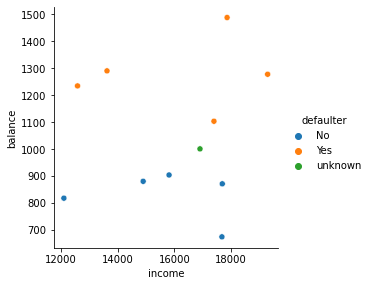

In [59]:
#visualizing data using seaborn - pariplot
import seaborn as sns
sns.pairplot(defaulter,hue="defaulter",
             x_vars="income",y_vars="balance",height=4)

In [60]:
# retrieving first data point from the dataset
x1 = defaulter.loc[0,["balance","income"]]
# retrieving second data point from the dataset
x2 = defaulter.loc[1,["balance","income"]]
# Euclidean distance between first and second data point
np.linalg.norm(x1-x2)
#output
#5787.1537602581275

5787.1537602581275

### Limitation of Euclidean distance

One of the limitations of Euclidean distance is that attributes with larger ranges contribute more value to the Euclidean distance.

You can observe that the difference in the values of age for T1 and T3 (i.e. 26-36=10) is significantly less than the difference in the values of age for T2 and T3 (i.e. 66-36=30). However, the Euclidean distance between the tuples T1 and T3 is same as that of the Euclidean distance between the tuples T2 and T3, suggesting that the parameter loanAmt has a high influence on the Euclidean distance as compared to the age.

To avoid this situation, all the numeric attributes of the tuples can be normalized before they are used for computing the Euclidean distance. Normalization is essential to take into consideration, the different measurement scales of the attributes. Normalization is not just applied to kNN, it is often considered as a good practice to normalize the data before running any machine learning algorithm.

In [61]:
# considering 3 random datapoints - t1, t2, t3
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])
# distance between t1 & t3
dist_t3_t1 = np.linalg.norm(t3-t1)
# distance between t2 & t3
dist_t2_t3 = np.linalg.norm(t2-t3)
print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)
#output
#Distance between t2 and t3 9000.049999861112 
#Distance between t1 and t3 9000.00555555384

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


In [62]:
# Using MinMaxScaler of Scikit Learn library for Normalization of all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance","income"]])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [63]:
#distance between two normalized data points
x1_n = defaulter.loc[0,["norm_balance","norm_income"]]
x2_n = defaulter.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)
#output
#1.1489497815843785

1.1489497815843788

In [64]:
# Lambda function to calculate Euclidean distance
x11 = defaulter.loc[10,["norm_balance","norm_income"]] 
dist_to_X11 = lambda x: np.linalg.norm(x-x11)
# calculating Euclidean Distance
defaulter["dist_toX11"] = defaulter[["norm_balance",
                                               "norm_income"]].apply(dist_to_X11,axis=1)
# sorting the datapoints based on distance to find the 'k' nearest neighbors
defaulter.sort_values("dist_toX11")

,defaulter,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


In [65]:
#step 1 - loading the data
defaulter = pd.read_csv("defaulter/defaulter.csv")

In [66]:
#step 2 - feature engg
from sklearn.preprocessing import MinMaxScaler
#applying MinMaxScaler to the default dataset
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter.head()

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000


In [67]:
#step 3 - splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
# selecting the predictors and target
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']
# splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [68]:
#step 4 - building the model
from sklearn.neighbors import KNeighborsClassifier
#kNN with k=3
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [69]:
#Step 5 - Evaluate the model accuracy
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.977375 0.967

0.75 1.0


In [70]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 8, n_neighbors = 9

## SVM

In [71]:
#reading input from csv file
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
## feature engg
#creating new column 'v_nv', to distinguish versicolor species from rest
#the below lambda function returns 0 for 'versicolor' species and returns 1 for rest.
v_nv_fn = lambda x: 0 if x=="versicolor" else 1
# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)
iris_data[iris_data['v_nv']==0].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


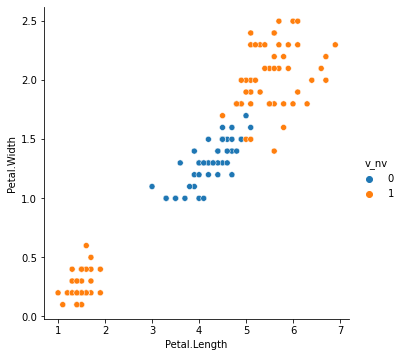

In [73]:
#visualization using seaborn - pairplot
import seaborn as sns
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="v_nv",height=5)

In [74]:
#Support Vector Classification
from sklearn.svm import SVC
#setting predictors and target
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["v_nv"]
# model building
model = SVC()
model.fit(X,Y)
model.score(X,Y)
# 0.9533333333333334

0.9533333333333334

C:\Users\Shrinath\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

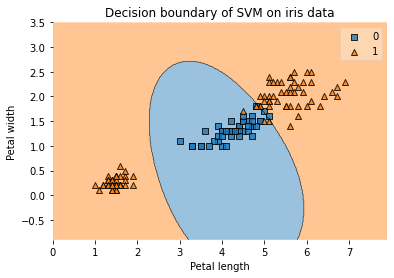

In [75]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')

### Multiclass classification

In [76]:
# encoding the species column
iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2
#data type (dtype) of the column will be converted to 'category'
iris_data.Species = iris_data.Species.astype("category") 
                           #https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [77]:
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["Species"]
model = SVC()
model.fit(X,Y)

SVC()

C:\Users\Shrinath\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

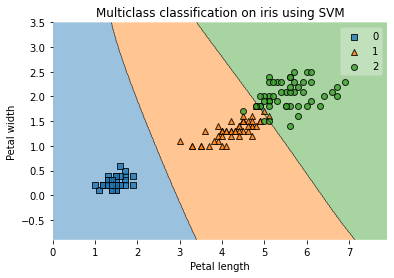

In [78]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y)
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')

### K-fold cross validation technique
k-fold cross-validation where the training data is divided into k equal sized subsamples. Among these subsamples, k-1 subsamples are selected for training and the remaining subsample is used for validation. This procedure is repeated k times such that each subsample is used exactly once as a validation dataset. The results are aggregated to get the final prediction.

In [79]:
#reading the data
#read data from input csv file
defaulter = pd.read_csv("defaulter/defaulter.csv")

In [80]:
#feature engg
#### Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]

In [81]:
from sklearn.model_selection import train_test_split
X=defaulter[["norm_balance","norm_income"]]
Y=defaulter['defaulter']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all k neighbor values
param_grid = {'n_neighbors': np.arange(1, 15,2)}
'''using GridSearchCV to perform k-fold validation'''
knn_gscv = GridSearchCV(knn, param_grid,return_train_score=True, verbose=1,scoring='accuracy')
#fit model to data
knn_gscv.fit(X_train,Y_train)
#storing results to dataframe
#print(knn_gscv.cv_results_)
df=pd.DataFrame(knn_gscv.cv_results_)
#filtering out columns
df=df[['param_n_neighbors','mean_train_score','mean_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [83]:
model = KNeighborsClassifier(n_neighbors = 6, metric="euclidean")
model.fit(X_train,Y_train)
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.971 0.9685

0.75 1.0


### Ensemble methods

Ensemble methods are techniques that aim at improving the prediction accuracy in models by creating and combining multiple models instead of using a single model.

Two commonly used ensemble methods are Bagging and Boosting.

##### Bagging 
In Bagging, multiple models are trained using the same algorithm on different subsets of the training data. Once multiple models are trained in this manner, they are aggregated using maximum voting or simple aggregation methods such as averaging.

Random forest is a special type of bagging algorithm which uses decision trees as base models. It creates random subsets of the training dataset to create a collection of trees. While building a tree, it also randomly samples the feature variables at each split. This adds another layer of variety and randomness to the final classifier. While using the random forest on a new data, the new data is run through each of the trees in the collection and the target predictions from them are aggregated to give the final output.

In [84]:
#reading input data from csv file
spam_data = pd.read_csv("spambase.csv")

In [85]:
from sklearn.model_selection import train_test_split
features = spam_data.columns.drop('spam')
target = "spam"
X=spam_data[features]
Y=spam_data[target]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [86]:
from sklearn.ensemble import RandomForestClassifier
# building model with RandomforestClassifier with 10 underlying Decision tree models/ estimators
model = RandomForestClassifier(n_estimators=10,
                               min_samples_split=20,
                               min_impurity_decrease=0.05)
model.fit(X_train,Y_train)
# Evaluate the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.8633152173913043 0.8577633007600435

0.8505434782608695 0.8512486427795874


In [87]:
feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)

,feature,importance
55,capital_run_length_longest,0.222222
54,capital_run_length_average,0.18321
4,word_req_our,0.111111
6,word_freq_remove,0.111111
23,word_freq_money,0.111111
52,char_freq_$,0.079226
15,word_freq_free,0.070898
2,word_freq_all,0.055566
24,word_freq_hp,0.055545
38,word_freq_pm,0.0


#### Boosting
Boosting is another ensemble learning technique where the models are built sequentially. Each new model is built by taking into account the mistakes made by the previous model in predicting target value. This is done by assigning the same weight to each training sample at the beginning. The samples which get incorrectly labelled by a model are given more weight while building the subsequent model. Output of a boosted model is the weighted sum of the predictions made by the individual models. AdaBoost is one of the well known boosting techniques. 

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#building AdaBoostClassifier with 10 models, also called as estimators.
model = AdaBoostClassifier(n_estimators=10)
model.fit(X_train,Y_train)
# Evaluating the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.9195652173913044 0.9272529858849077

0.9195652173913044 0.9272529858849077


In [89]:
feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)

,feature,importance
15,word_freq_free,0.1
45,word_freq_edu,0.1
55,capital_run_length_longest,0.1
52,char_freq_$,0.1
6,word_freq_remove,0.1
51,char_freq_!,0.1
26,word_freq_george,0.1
44,word_freq_re,0.1
24,word_freq_hp,0.1
36,word_freq_1999,0.1


# Unsupervised learning
## K-means clustering

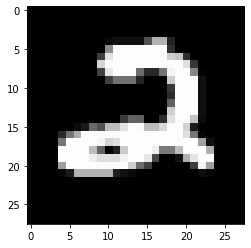

In [90]:
# Load the data from the file
mnist_data = pd.read_csv("mnist_data.csv")
# Plotting the first image in the data
im = np.asarray(mnist_data.iloc[0:1,:]).reshape(28,28)
plt.imshow(im,cmap=plt.cm.gray)

In [91]:
from sklearn.cluster import KMeans
# building K-Means model with 10 clusters
model = KMeans(n_clusters=10)
model.fit(mnist_data)
# Take a look at the cluster labels that are generated
# Note that these cluster labels do not indicate the digit in the images
print(np.unique(model.labels_))
#output
#[0 1 2 3 4 5 6 7 8 9]

[0 1 2 3 4 5 6 7 8 9]


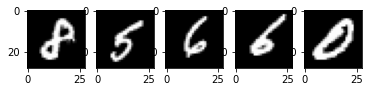

In [92]:
# Explore images in cluster 1
# cluster1 variable holds the data that has been grouped into the first cluster
cluster1 = mnist_data[model.labels_==0]
# Pick 5 random images from cluster 1
cluster1_imgs = cluster1.iloc[[np.random.randint(0,cluster1.shape[0]) for i in range(0,5)]]
# Plot the images in cluster 1
for i in range(0,cluster1_imgs.shape[0]):
    plt.subplot(1,5,i+1)
    img_fig = np.asarray(cluster1_imgs[i:i+1]).reshape(28,28)
    plt.imshow(img_fig,cmap=plt.cm.gray)

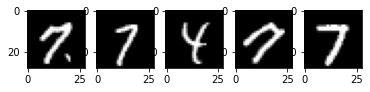

In [93]:
# Explore images in cluster 2
cluster2 = mnist_data[model.labels_==1]
cluster2_imgs = cluster2.iloc[[np.random.randint(0,cluster2.shape[0]) for i in range(0,5)]]
for i in range(0,cluster2_imgs.shape[0]):
    plt.subplot(1,5,i+1)
    img_fig = np.asarray(cluster2_imgs[i:i+1]).reshape(28,28)
    plt.imshow(img_fig,cmap=plt.cm.gray)

## ANN

Text(0.5, 1.0, 'First digit in test data ')

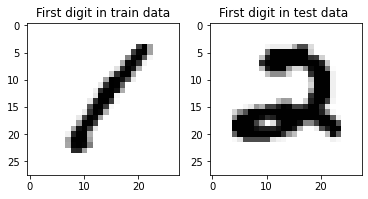

In [94]:
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels 
mnist_train = pd.read_csv("datasets/mnist/train.csv")
mnist_test = pd.read_csv("datasets/mnist/test.csv")
# Let's visualize the image represented by the first rows of the train data and the test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")

In [95]:
"""Let us now assign the label column value to a new variable Y_train 
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]

In [96]:
from sklearn.neural_network import MLPClassifier
# Let us now create a neural network model to learn from train data
# We shall build a single hidden layer with 50 nodes. 
nn_model = MLPClassifier(hidden_layer_sizes=(50))
# The fit method initiates the learning process. When its execution completes, the model is learnt
nn_model.fit(X_train,mnist_train.iloc[:,0])
# Now that we have a model, lets get it to predict the value of the first digit in the test data
print(nn_model.predict(mnist_test.iloc[0:1,]))
# output
# [2]

[2]


In [ ]:
from sklearn.metrics import classification_report
# report based on tain data
print(classification_report(Y_train,predicted_digit))